In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [37]:
df.isna().sum().sum()
df.columns

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')

In [39]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

col = ['Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index']
col2 = ['Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)']

scale = MinMaxScaler()
col= scale.fit_transform(df[col])
col2 = scale.fit_transform(df[col2])

le = LabelEncoder()
df['Encoded Country'] = le.fit_transform(df['Country'])
df['Encoded Year'] = le.fit_transform(df['Year'])

df

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Encoded Country,Encoded Year
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,77,5
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,147,1
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,136,16
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,38,18
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,92,4
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,13,2
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,88,11
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,170,2


In [41]:
# Group by Year to get average pollution levels
yearly_pollution = df.groupby('Year')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean()

# Reset index and optionally merge back to main df
yearly_pollution.reset_index(inplace=True)
df = pd.merge(df, yearly_pollution, on='Year', suffixes=('', '_YearlyAvg'))
df

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Encoded Country,Encoded Year,Air_Pollution_Index_YearlyAvg,Water_Pollution_Index_YearlyAvg,Soil_Pollution_Index_YearlyAvg
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,77,5,179.756000,108.245333,72.922000
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,147,1,137.964444,83.933333,71.340000
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,136,16,163.471000,139.585000,67.979000
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,38,18,244.112000,84.748000,108.788000
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,46,8,194.782857,102.114286,75.508571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,92,4,171.120909,120.719091,69.959091
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,13,2,174.661538,123.617692,75.344615
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,88,11,174.016154,127.282308,51.105385
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,170,2,174.661538,123.617692,75.344615


In [43]:
# Option 1: Use Air Pollution Index for classification
def classify_severity(value):
    if value < 100:
        return 'Low'
    elif 100 <= value < 200:
        return 'Medium'
    else:
        return 'High'

df['Pollution_Severity'] = df['Air_Pollution_Index'].apply(classify_severity)

df['Severity_Label'] = le.fit_transform(df['Pollution_Severity'])  # Low=1, Medium=2, High=0 (example)

In [45]:
# Phase 2 - Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree
# 1. Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Feature set
X = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
        'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]
y = df['Severity_Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       0.47      0.70      0.56        10
         Low       0.50      0.86      0.63         7
      Medium       0.69      0.39      0.50        23

    accuracy                           0.55        40
   macro avg       0.55      0.65      0.56        40
weighted avg       0.60      0.55      0.54        40

Confusion Matrix:
 [[7 0 3]
 [0 6 1]
 [8 6 9]]


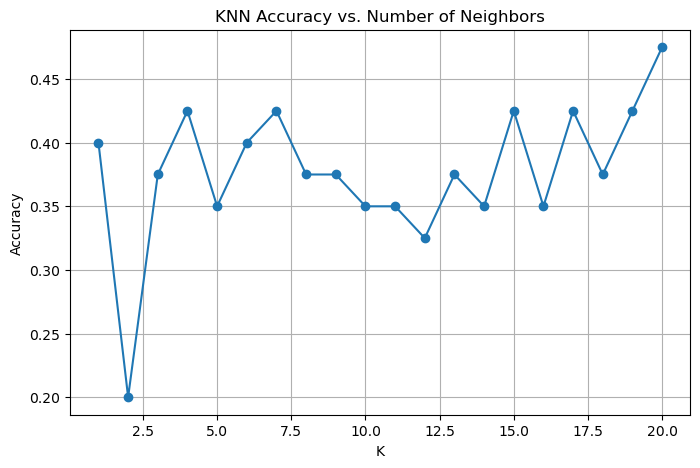

Best K: 20
Accuracy: 0.475

Classification Report:
               precision    recall  f1-score   support

        High       0.28      0.50      0.36        10
         Low       0.00      0.00      0.00         7
      Medium       0.64      0.61      0.62        23

    accuracy                           0.47        40
   macro avg       0.30      0.37      0.33        40
weighted avg       0.44      0.47      0.45        40


Confusion Matrix:
 [[ 5  0  5]
 [ 4  0  3]
 [ 9  0 14]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# 2. K-Nearest Neighbors (KNN)
from sklearn.preprocessing import StandardScaler

X = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']]
y = df['Severity_Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Best K
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Best K: {best_k}")
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [48]:
# 3. Decision Tree
features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
            'Industrial_Waste (in tons)', 'CO2_Emissions (in MT)']

X = df[features]
y = df['Severity_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Basic model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        10
         Low       1.00      0.86      0.92         7
      Medium       0.96      1.00      0.98        23

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix:
 [[10  0  0]
 [ 0  6  1]
 [ 0  0 23]]


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Evaluate best model
best_tree = grid.best_estimator_
y_pred_best = best_tree.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'max_depth': 2, 'min_samples_split': 2}
Tuned Model Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        10
         Low       1.00      0.86      0.92         7
      Medium       0.96      1.00      0.98        23

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix:
 [[10  0  0]
 [ 0  6  1]
 [ 0  0 23]]


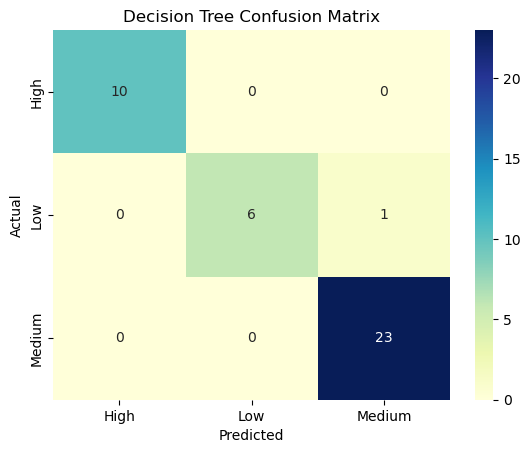

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
